# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
Scatterplot: Nommé également scattergram, scatter graph ou aussi scatter chart, les scatter plots sont un type de graphique sous forme d’un nuage de points montrant ainsi comment une variable  est affectée par une autre. L’axe vertical, ou l’axe des ordonnées est utilisé pour afficher l’une des variables et un axe horizontal, ou l’axe des abscisses pour l’autre variable. 

Barplot: Les diagrammes en barres montrent les dénombrements de fréquence des valeurs pour les différents niveaux d'une variable catégorielle ou nominale. Parfois, les diagrammes en barres affichent également d'autres statistiques, comme des pourcentages

Boxplot: Aussi appelée « diagramme en boîte » ou « box plot », la boîte à moustaches est la représentation graphique d'une série statistique. Elle fait apparaître la plus petite valeur, le premier quartile, la valeur médiane, le troisième quartile et la plus grande valeur.

Violinplot: Un violin plot est utilisé pour visualiser la distribution des données et sa densité de probabilité. Ce graphique est une combinaison d’un boxplot et d’un density plot retourné placé de chaque côté, pour afficher la distribution des données.

Histogramme: L'histogramme est un représentation graphique permettant de représenter la répartition empirique d'une variable aléatoire ou d'une série statistique en la représentant avec des colonnes correspondant chacune à une classe et dont l'aire est proportionnelle à l'effectif de la classe
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Le fichier est un fichier texte qui ressemble beaucoup à un fichier CSV séparer par des tabulations.
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Organism name at the species level according 
Kingdom        Taxonomic division: Archaea, Bacteria, Eukaryota, or Viruses 
Group                  Commonly used organism groups 
                       Eukaryota: Animals, Fungi, Plants, Protists;                           
                       Prokaryota: group corresponds to phylum; 
                       Viruses: groups defined as the first level (not ranked)                        
                       below the kingdom of Viruses

SubGroup       NCBI Taxonomy level below group:
                       Eukaryota: Mammals, Birds, Fishes, Flatworms, Insects, Amphibians
                       Reptiles, Roundworms, Ascomycetes, Basidiomycetes, 
                       Land Plants, Green Algae, Apicomplexans, Kinetoplasts; 
                       Prokaryota: sub-groups correspond to class level; 
                       Viruses: sub-groups correspond to families including floating genera 

Size (Mb)      Estimated genome size 
Chrs           Number of chromosomes 
Organelles     Number of the organelles 
Plasmids       Number of plasmids 
BioProjects    Number of genome sequencing projects
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [2]:
import csv
import numpy as np

with open("overview.txt") as csvfile:
    file = csv.reader(csvfile, delimiter="\t", quotechar="'");
    rows = np.unique([i for i in file], axis=0)

headers = rows[0]
rows = rows[1:]   # faut enlever le header :)
len(rows)

87888

### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Un royaume est la facon dont les êtres vivants sont séparés en fonction de leur type de cellules. Ici les différents types sont: Archaea, Bacteria, Eukaryota, or Viruses 
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
4 (Archaea, Bacteria, Eukaryota, or Viruses)
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [3]:
kingdomSet = set()
for i in rows:
    kingdomSet.add(str(i[1]))
    
answerQ7 = dict()
kingdomRows = rows[:,1]
for kingdom in kingdomSet:
    answerQ7[kingdom] = int(sum(kingdomRows == kingdom))
answerQ7

{'Viruses': 32573, 'Bacteria': 37492, 'Archaea': 2263, 'Eukaryota': 15560}

### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Les groupes sont une facon de catégorisé plus précisement les kingdoms
```

Q9. Combien de groupes sont présents par royaume ?

In [4]:
answerQ9 = dict()
for kingdom in kingdomSet:
    answerQ9[kingdom] = len(set(rows[kingdomRows == kingdom, 2]))
answerQ9

{'Viruses': 8, 'Bacteria': 37, 'Archaea': 11, 'Eukaryota': 5}

Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [5]:
answerQ10 = dict()
for kingdom in kingdomSet:
    answerQ10[kingdom] = dict()
    kingdomGroups = rows[kingdomRows == kingdom, 2]
    for group in set(kingdomGroups):
        answerQ10[kingdom][str(group)] = int(sum(kingdomGroups == group))

answerQ10

{'Viruses': {'unclassified phages': 1233,
  'Satellites': 65,
  'Other': 30533,
  'Deltavirus': 10,
  'dsRNA viruses': 30,
  'unclassified archaeal viruses': 15,
  'unclassified virophages': 3,
  'unclassified viruses': 684},
 'Bacteria': {'Spirochaetota': 344,
  'Terrabacteria group': 13337,
  'FCB group': 5037,
  'Nitrospirota': 156,
  'Myxococcota': 146,
  'Deferribacterota': 27,
  'Caldisericota/Cryosericota group': 21,
  'Other': 2,
  'Thermosulfidibacterota': 1,
  'Atribacterota': 43,
  'Candidatus Tharpellota': 2,
  'Chrysiogenota': 6,
  'Bacteria incertae sedis': 3872,
  'Coprothermobacterota': 5,
  'Candidatus Hinthialibacterota': 2,
  'Dictyoglomota': 5,
  'Pseudomonadota': 11098,
  'delta/epsilon subdivisions': 288,
  'Candidatus Krumholzibacteriota': 4,
  'Candidatus Moduliflexota': 2,
  'Calditrichota': 10,
  'Bdellovibrionota': 122,
  'Nitrospinota/Tectimicrobiota group': 39,
  'Aquificota': 42,
  'Candidatus Deferrimicrobiota': 2,
  'Thermodesulfobiota': 2,
  'Campylobac

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

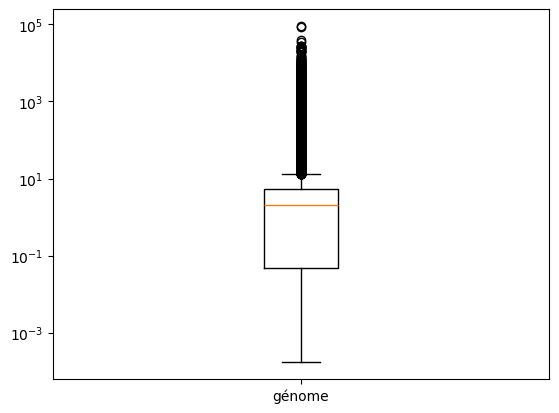

In [22]:
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.boxplot([float(i) for i in rows[:, 4] if i != '-'], tick_labels=["génome"])
plt.yscale("log")
plt.show()

Q12. Affichez la distribution par royaume.

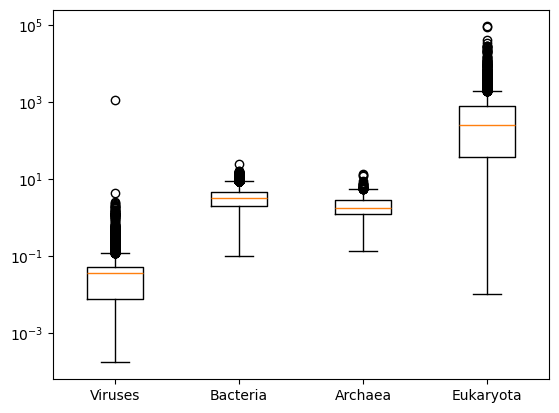

In [23]:
arr = []
for i in kingdomSet:
    v = [float(p) for p in rows[rows[:, 1] == i, 4] if p != '-']
    arr.append(v)
plt.boxplot(arr, autorange=True, tick_labels=list(kingdomSet))
plt.yscale("log")
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

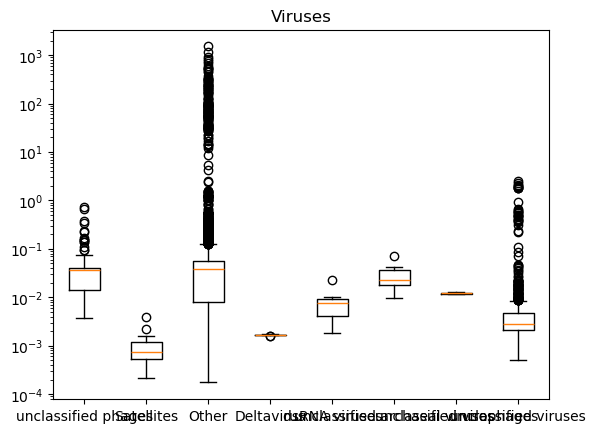

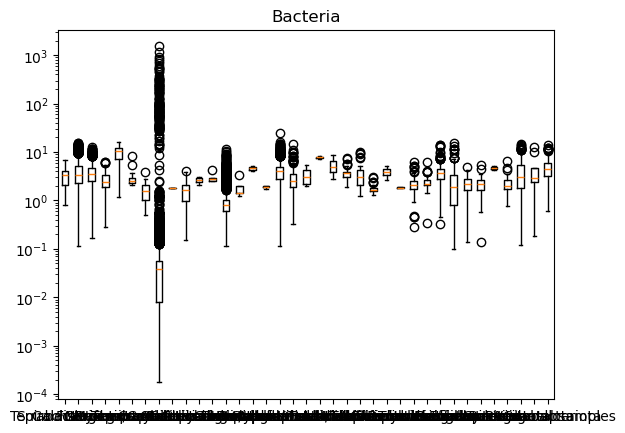

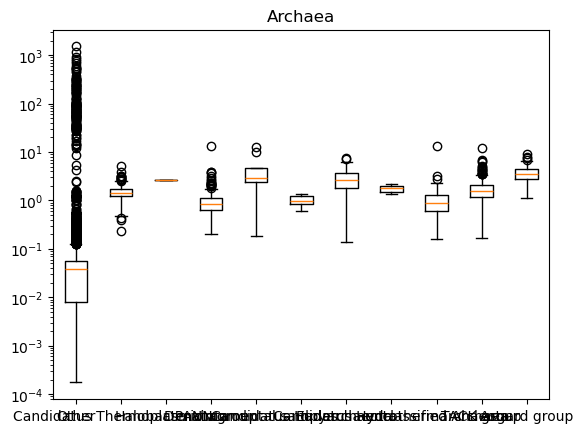

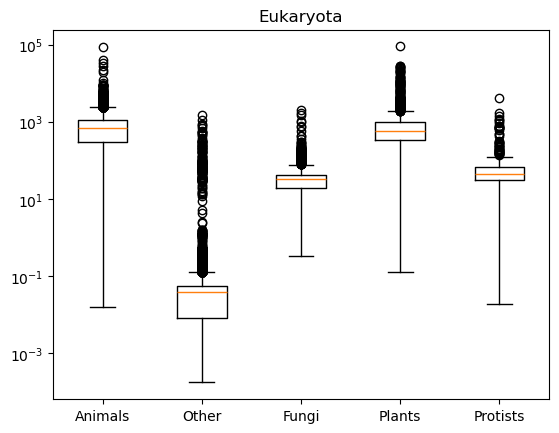

In [26]:
for kingdom in kingdomSet:
    arr13 = []
    for group in set(rows[kingdomRows == kingdom, 2]):
        arr13.append([])
        for row in rows:
            if row[2] == group and row[4] != '-':
                arr13[-1].append(float(row[4]))
    plt.title(kingdom)
    plt.boxplot(arr13, autorange=True, tick_labels=set(rows[kingdomRows == kingdom, 2]))
    plt.yscale("log")
    plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [45]:
A14 = dict()
for kingdom in kingdomSet:
    Q14Rows = rows[kingdomRows == kingdom]
    A14[kingdom] = str(Q14Rows[np.argmin([i if i != '-' else 9999 for i in Q14Rows[:, 4]]), [0, 4]])
A14

{'Viruses': "['Hippotragine gammaherpesvirus 1' '0.000174']",
 'Bacteria': "['bacterium AG-323-L21' '0.101587']",
 'Archaea': "['candidate division MSBL1 archaeon SCGC-AAA385M02' '0.137797']",
 'Eukaryota': "['Fragilariopsis kerguelensis' '0.010223']"}

Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [49]:
A15 = dict()
for kingdom in kingdomSet:
    Q15Rows = rows[kingdomRows == kingdom]
    A15[kingdom] = str(Q15Rows[np.argmax([i if i != '-' else 0 for i in Q15Rows[:, 4]]), [0, 4]])
A15

{'Viruses': "['Acinetobacter phage MD-2021a' '4.29842']",
 'Bacteria': "['Actinomadura physcomitrii' '9.99958']",
 'Archaea': "['Candidatus Lokiarchaeota archaeon' '9.04767']",
 'Eukaryota': "['Leucopsar rothschildi' '999.683']"}

## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

array([1, 1, 1, ..., 3, 1, 1], shape=(44220,))

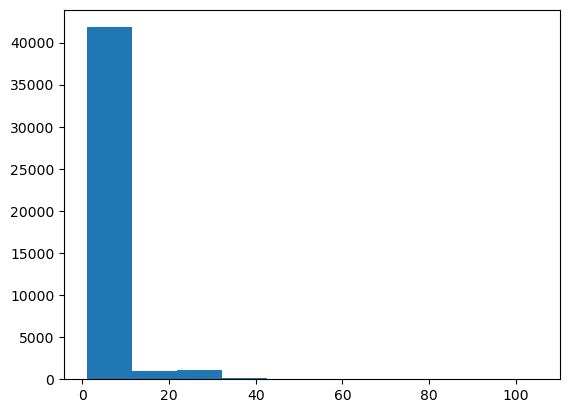

In [72]:
chromosomes = np.int_(rows[rows[:, 5] != "-", 5])
plt.hist(chromosomes)
chromosomes

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

array([['ANMV-1 virus', 'Viruses', 'unclassified archaeal viruses', ...,
        '-', '-', '1'],
       ['Abalone herpesvirus Taiwan/2004', 'Viruses', 'Other', ..., '-',
        '-', '1'],
       ['Abalone herpesvirus Victoria/AUS/2009', 'Viruses', 'Other', ...,
        '-', '-', '1'],
       ...,
       ['water chestnut virus A', 'Viruses', 'Other', ..., '-', '-', '1'],
       ['wheat yellow stunt associated betaflexivirus', 'Viruses',
        'Other', ..., '-', '-', '1'],
       ['white sturgeon herpesvirus 2', 'Viruses', 'Other', ..., '-',
        '-', '1']], shape=(44220, 9), dtype='<U102')

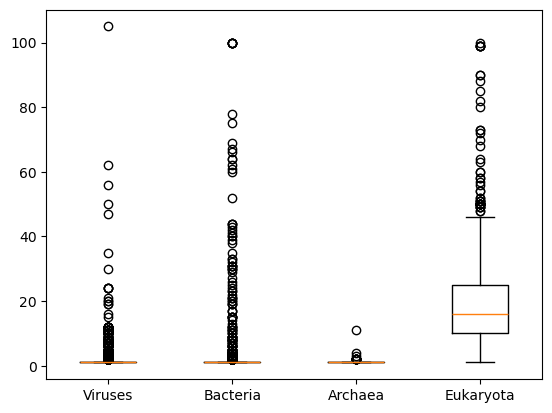

In [82]:
chromo = rows[rows[:, 5] != "-"]
plt.boxplot([np.int_(chromo[chromo[:, 1] == kingdom, 5]) for kingdom in kingdomSet], tick_labels=kingdomSet)
chromo

Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

## ```markdown
Votre réponse ici
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

In [ ]:
#Votre code ici

Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

In [ ]:
#Votre code ici

Q21. Qu’observez-vous ?

```markdown
Votre réponse ici
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Votre réponse ici
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q24. Qu'observez-vous ?

```markdown
Votre réponse ici
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Votre réponse ici
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

In [ ]:
#Votre code ici

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
#Votre code ici

Q28. Combien d'organismes ont > 1 projets ?

In [ ]:
#Votre code ici

Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
#Votre code ici

Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Votre réponse ici
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Votre réponse ici
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

In [ ]:
#Votre code ici

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

In [ ]:
#Votre code ici

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

In [ ]:
#Votre code ici

Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

In [ ]:
#Votre code ici

Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
Votre réponse ici
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [ ]:
#Votre code ici

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici